In [29]:
import numpy as np
import scipy as sp
import xarray as xr

In [30]:
def check_zeta(ds):
    """
    da_stacked containes values of zeta < -1 and their coordinates
    """
    da = ds.zeta.isel(ocean_time=-1)
    da_stacked = da.where(da<-1).stack(x=['eta_rho','xi_rho'])
    da_stacked = da_stacked[da_stacked.notnull()]
    return da_stacked

In [31]:
def check_temp(ds):
    """
    Finds lacations (eta, xi, s) of the points with high temperature
    """
    temp_da = ds.temp.isel(ocean_time=-1)
    temp_da_stacked = temp_da.where(temp_da>12).stack(x=['eta_rho', 'xi_rho', 's_rho'])
    temp_da_stacked = temp_da_stacked[temp_da_stacked.notnull()]
    return temp_da_stacked

In [32]:
def plot_bad_temp(ds, temp_da_point):
    bad_temp_point = temp_da_point
    eta, xi, s = bad_temp_point.eta_rho.values, bad_temp_point.xi_rho.values, bad_temp_point.s_rho.values
    print(f"Xi: {xi}; Eta: {eta}")
    ds.temp.isel(ocean_time=-1, eta_rho=slice(eta-5,eta+5), xi_rho=slice(xi-5,xi+5)).sel(s_rho=s).plot(figsize=(10, 5))

In [33]:
def filter(ds, sigma=1):
    """
    Applies gaussian filter to ds.h.values
    """
    new_values = sp.ndimage.gaussian_filter(ds.h.values, sigma, mode='nearest')
    ds.h.values = new_values
    return ds

In [34]:
def save_to_netcdf(ds, name):
    ds.to_netcdf(path=f'fram_data/norfjords_160m_{name}.nc', format='NETCDF4')

In [35]:
def gen_rivers_map(ds, grid_ds):
    map_shape = grid_ds.dims['xi_rho'], grid_ds.dims['eta_rho']
    riv_map = np.ones(map_shape)
    for river_id in ds.river.values:
        river_id = int(river_id-1)
        x_pos = int(ds.river_Xposition[river_id].values)
        y_pos = int(ds.river_Eposition[river_id].values)
        riv_map[x_pos, y_pos] = np.NaN 
    
    return riv_map

In [36]:
grid_ds = xr.open_dataset('fram_data/norfjords_160m_grid_version3.nc')
his_ds =  xr.open_dataset('fram_data/roho160_his_0002.nc')
rst_ds =  xr.open_dataset('fram_data/roho160_rst.nc')
riv_ds = xr.open_dataset('fram_data/norfjords_160m_river_v2+.nc')

In [37]:
ds = his_ds
xi, eta, s, delta = 776, 463, 32, 100

In [38]:
rivers_map = gen_rivers_map(riv_ds, grid_ds)

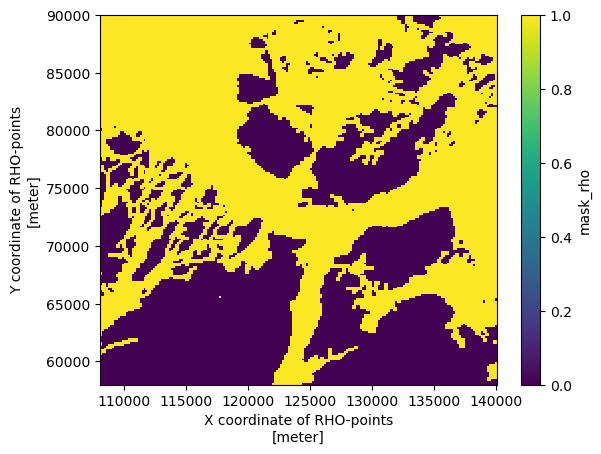

In [41]:
(grid_ds.mask_rho.isel(xi_rho=slice(xi-delta, xi+delta), eta_rho=slice(eta-delta, eta+delta)) * 
 rivers_map[xi-delta:xi+delta, eta-delta:eta+delta]).plot()  # .pcolormesh(x="lon_rho", y="lat_rho", cmap='PuBuGn')

In [ ]:
ds.u.isel(xi_u=slice(xi-delta, xi+delta), 
          eta_u=slice(eta-delta, eta+delta), ocean_time=-1, s_rho=s).plot()

In [ ]:
rst_ds.v.isel(xi_v=slice(xi-delta, xi+delta), 
              eta_v=slice(eta-delta, eta+delta), ocean_time=-1, s_rho=s).plot()

In [ ]:
ds.v.isel(xi_v=slice(xi-delta, xi+delta), 
          eta_v=slice(eta-delta, eta+delta), ocean_time=-1, s_rho=s).plot()

In [ ]:
(grid_ds.mask_rho.isel(xi_rho=slice(xi-delta, xi+delta), eta_rho=slice(eta-delta, eta+delta)) * 
 ds.zeta.isel(ocean_time=-1, xi_rho=slice(xi-delta, xi+delta), eta_rho=slice(eta-delta, eta+delta))).plot()

In [ ]:
(grid_ds.mask_rho.isel(xi_rho=slice(xi-delta, xi+delta), eta_rho=slice(eta-delta, eta+delta)) * 
 grid_ds.h.isel(xi_rho=slice(xi-delta, xi+delta), eta_rho=slice(eta-delta, eta+delta))).plot()